Jair Sánchez Sierra

# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy import *
from scipy.interpolate import CubicSpline

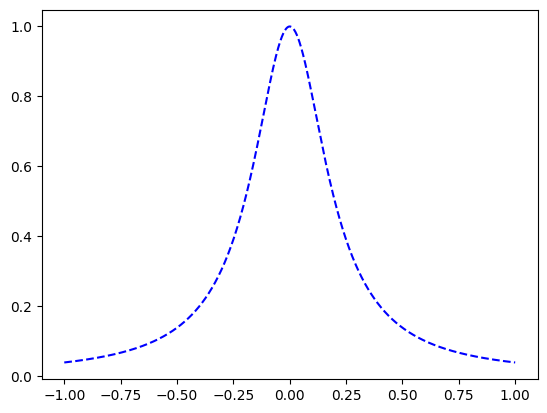

In [85]:
f = lambda x: 1 / (1 + 25 *(x**2))
f_ = lambda x: 1 / (1 + 25 *(x**2))

x = np.linspace(-1,1,1000)

plt.plot(x,f(x),"b--")
plt.show()

In [86]:
N =4
n = N+1
x_ = np.linspace(-1,1,n)
PL = lagrange(x_, f(x_))
xL = np.linspace(np.min(x_),np.max(x_))
xL


array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

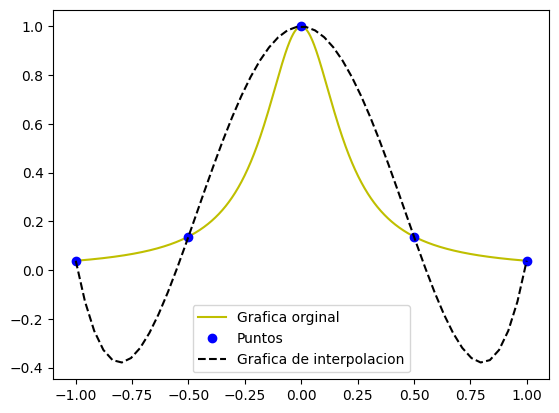

In [87]:
plt.plot(x,f(x),"y-", label ="Grafica orginal")
plt.plot(x_, f(x_),"bo", label ="Puntos")
plt.plot(xL,PL(xL),"k--", label = "Grafica de interpolacion")
plt.legend()

### **2.Punto**

In [88]:
import sympy as sp
sp.init_printing()

f_s = lambda y: 1/(1+25*y**2)

y = sp.symbols("y")
f_s(y)

    1    
─────────
    2    
25⋅y  + 1

In [89]:
#Derivada

df5 = sp.diff(f_s(y),y,5)

#ahora hagamos que ese df5 pueda evaluar valores
f5 = sp.lambdify(y,df5, "numpy")
f5(2)


-0.20491603468558328

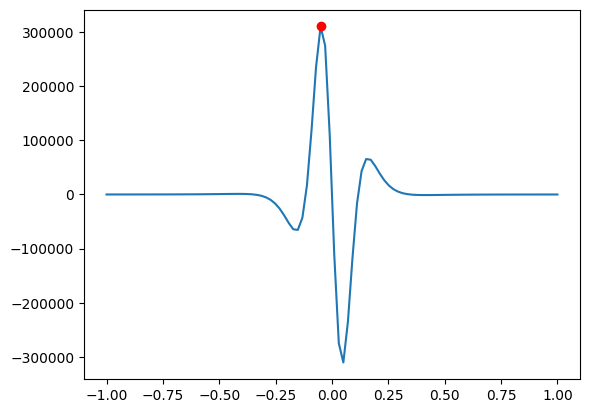

In [90]:
x5 = np.linspace(-1,1,100)
plt.plot(x5,f5(x5))
x_max = np.max(abs(f5(x5)))
x_zeta = np.argmax(abs(f5(x5))) #posicion delmaximo
xx = x5[x_zeta] #punto x donde miro la funcion
plt.plot(xx,f5(xx),"ro")
plt.show()




In [91]:
import math as mt

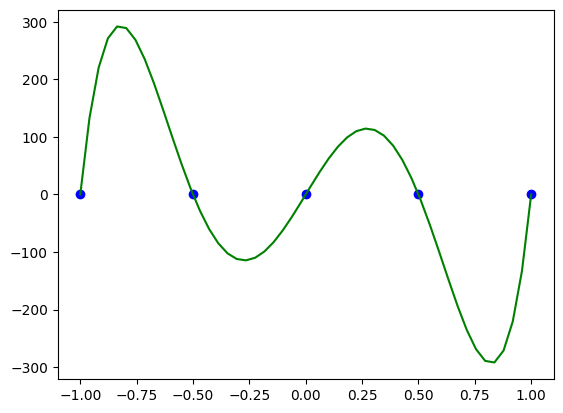

In [92]:
plt.plot(x_,f(x_),"bo")
plt.plot(xL, x_max/(mt.factorial(n))*(xL-x_[0])*(xL-x_[1])*(xL-x_[2])*(xL-x_[3])*(xL-x_[4]),"g-")
plt.show()

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

y la funcion de error.

**Función original y función interpolada con Lagrange**

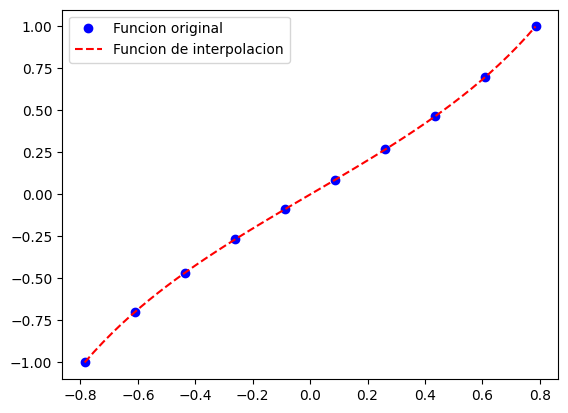

In [93]:
N = 9
n = N + 1
ft = lambda x: np.tan(x)
xt = np.linspace(-np.pi/4,np.pi/4, n)

xlt = np.linspace(np.min(xt),np.max(xt))
Lg = lagrange(xt,ft(xt))




plt.plot(xt, ft(xt), "bo", label ="Funcion original" )
plt.plot(xlt, Lg(xlt), "r--", label = "Funcion de interpolacion")
plt.legend()

**Variamos los datos a ver en que cambia la interpolación**

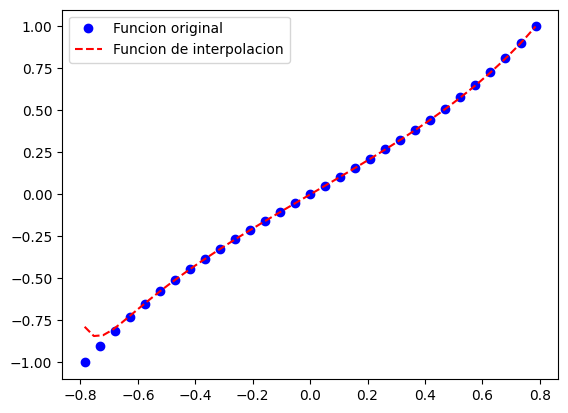

In [94]:
N = 30
n = N + 1
ft = lambda x: np.tan(x)
xt = np.linspace(-np.pi/4,np.pi/4, n)

xlt = np.linspace(np.min(xt),np.max(xt))
Lg = lagrange(xt,ft(xt))




plt.plot(xt, ft(xt), "bo", label ="Funcion original" )
plt.plot(xlt, Lg(xlt), "r--", label = "Funcion de interpolacion")
plt.legend()

**Función de error**


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [95]:
import sympy as sp
sp.init_printing()

ftt = lambda y: sp.tan(y)
y = sp.symbols("y")


In [96]:
der = sp.diff(ftt(y),y,10)
ffd = sp.lambdify(y,der, "numpy")
xtt = np.linspace(-np.pi/4,np.pi/4,100)
xt_maxx = np.max(abs(ffd(xtt)))
xt_maxx

51733503.999999955

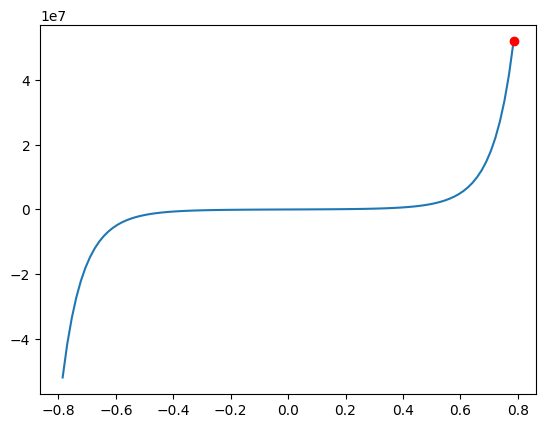

In [97]:

plt.plot(xtt,ffd(xtt))
x_zeta = np.argmax(abs(ffd(xtt))) #posicion delmaximo
xxt = abs(xtt[x_zeta]) #punto x donde miro la funcion
plt.plot(xxt,ffd(xxt),"ro")
plt.show()


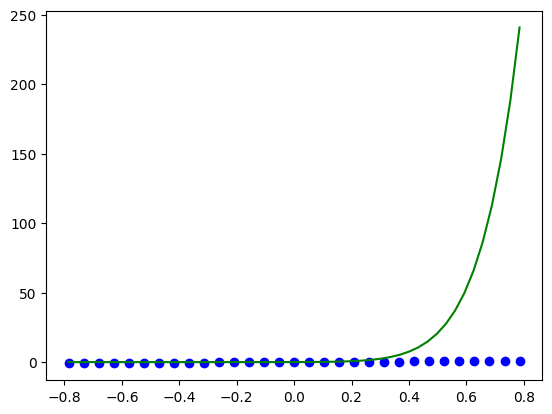

In [98]:
N = 9
n = N + 1
plt.plot(xt,ft(xt),"bo")
plt.plot(xlt, xt_maxx/(mt.factorial(n))*((xlt-xt[0])*(xlt-xt[1])*(xlt-xt[2])*(xlt-xt[3])*(xlt-xt[4])*(xlt-xt[5])*(xlt-xt[6])*(xlt-xt[7])*(xlt-xt[8])*(xlt-xt[9])),"g-")
plt.show()


##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


**a**

**Cree un dataframe y utilizando la interpolación de Lagrange encuentre valores intermedios**

In [99]:
x = np.array([1,1.3,1.6,1.9,2.2])
fx = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])


DF = pd.DataFrame({"Valores x": x, "Valores fx": fx})
DF

,Valores x,Valores fx
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

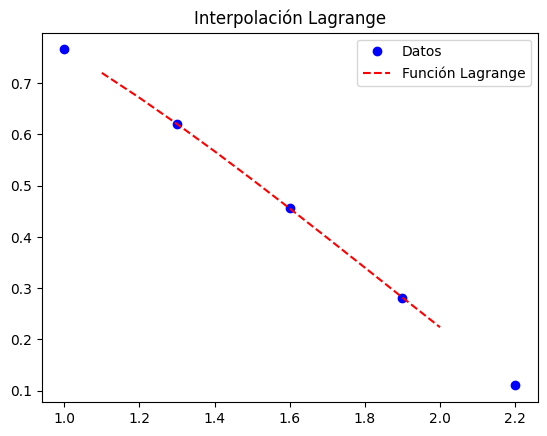

In [109]:
import pandas as pd

x = np.array([1,1.3,1.6,1.9,2.2])
fx = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])


new_x_range = np.arange(1.1, 2.1, 0.1)
LGf = lagrange(x, fx)


plt.plot(x,fx,"bo", label="Datos")
#plt.plot(x,fx,"k--", label="Función Original")
plt.plot(new_x_range,LGf(new_x_range),"r--", label="Función Lagrange")
plt.legend()
plt.title("Interpolación Lagrange")
plt.show()



c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia

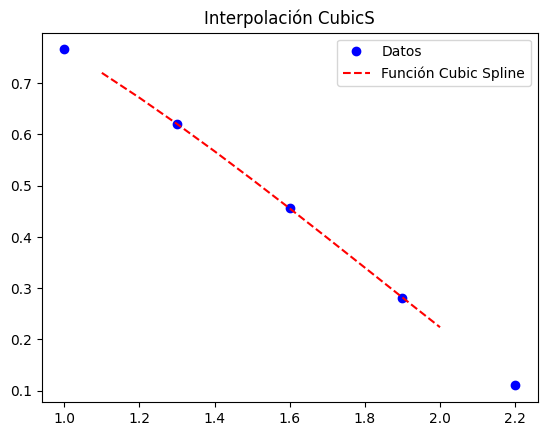

In [113]:
cs = CubicSpline(x,fx)

plt.plot(x,fx,"bo", label="Datos")
plt.plot(new_x_range,cs(new_x_range),"r--", label="Función Cubic Spline")
plt.legend()
plt.title("Interpolación CubicS")
plt.show()


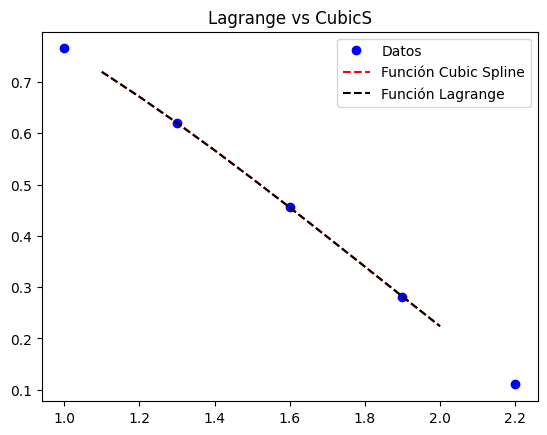

In [114]:
plt.plot(x,fx,"bo", label="Datos")
plt.plot(new_x_range,cs(new_x_range),"r--", label="Función Cubic Spline")
plt.plot(new_x_range,LGf(new_x_range),"k--", label="Función Lagrange")
plt.legend()
plt.title("Lagrange vs CubicS")
plt.show()

A pesar de que son metodos distintos y la manera en como generan los polinomios es difernte, se puede decir que en este caso se comportaron casi que iguales. Ajustaron de la misma manera los datos. No creo que pase esto cuando tenemos más datos, quizá el CubicSpline funcionaría mejor con más datos que el Lagrange.

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

**Imagen del pato**

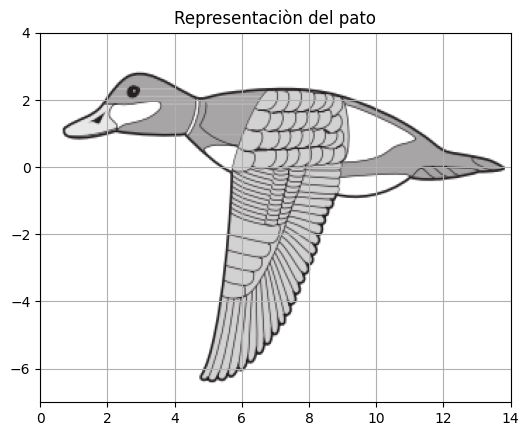

In [115]:
import urllib.request
pato= "https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png"
urllib.request.urlretrieve(pato,"pato.jpg")
imagen_pato=plt.imread("pato.jpg")

plt.figure()
plt.title("Representaciòn del pato")
plt.imshow(imagen_pato,extent=(0.3,14.28,-6.8,3.38))
plt.xlim(0,14)
plt.ylim(-7,4)
plt.grid()

**Definiendo los puntos**

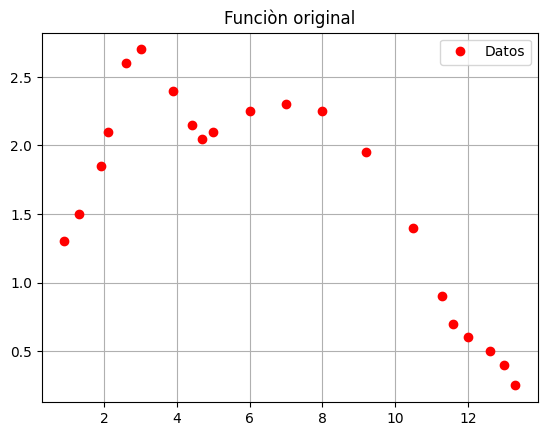

In [116]:
x = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])


plt.plot(x,y,"ro",label ="Datos")
plt.title("Funciòn original")
plt.grid()
plt.legend()

**Aplicando Lagrange**




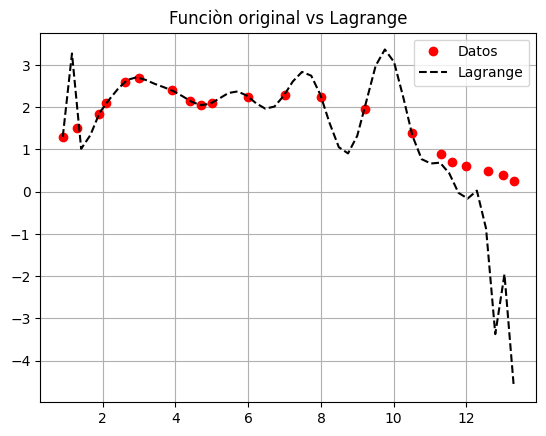

In [117]:
LL = lagrange(x,y)
xl = np.linspace(np.min(x),np.max(x))
plt.plot(x,y,"ro",label ="Datos")
plt.plot(xl,LL(xl),"k--",label="Lagrange")
plt.title("Funciòn original vs Lagrange")
plt.grid()
plt.legend()

**Aplicando CubicSpline**



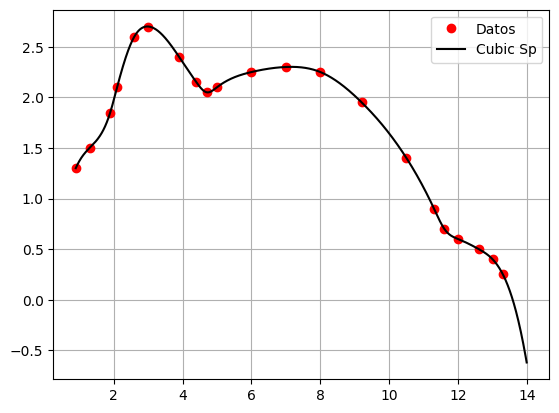

In [118]:
from scipy import *
from scipy.interpolate import CubicSpline
cs = CubicSpline(x,y)
xcs = np.arange(0.9,14,0.01)

plt.plot(x,y,"ro",label="Datos")
plt.plot(xcs,cs(xcs),"k-",label="Cubic Sp")
#plt.plot(xl, LL(xl), "b--",label="Lagrange")
plt.legend()
plt.grid()

**Comparando Lagrange con Cubic Spline**

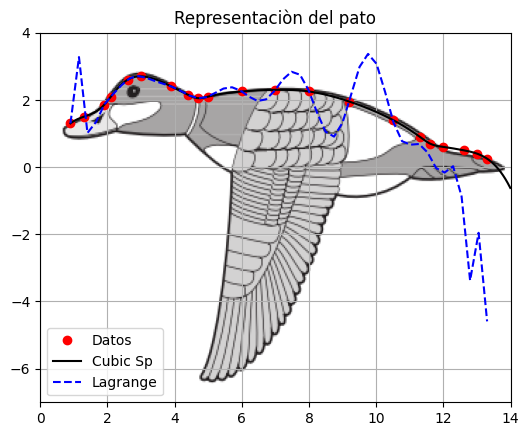

In [119]:
import urllib.request
pato= "https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png"
urllib.request.urlretrieve(pato,"pato.jpg")
imagen_pato=plt.imread("pato.jpg")

plt.figure()
plt.title("Representaciòn del pato")
plt.imshow(imagen_pato,extent=(0.3,14.28,-6.8,3.38))

plt.plot(x,y,"ro",label="Datos")
plt.plot(xcs,cs(xcs),"k-",label="Cubic Sp")
plt.plot(xl, LL(xl), "b--",label="Lagrange")
plt.legend()
plt.xlim(0,14)
plt.ylim(-7,4)
plt.grid()

**La interpolación de Lagrange** utiliza un solo polinomio de mayor grado para ajustar todos los datos. Por lo cual puede tener problemas al ajutarse, como el de grandes oscilaciones (como se notó en el pato).

**El CubicSpline** divide los datos en segmentos más pequeños y utilizan polinomios cúbicos suaves en cada segmento. Esto los hace  más adecuados para la interpolación de datos suaves y que no tengan tantas oscilaciones.